# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [3]:
Agri = pd.read_csv('Crop.csv')

In [4]:
Agri.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [5]:
Agri.tail()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,Coffee


In [6]:
Agri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
Agri.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
Agri.shape

(2200, 8)

In [9]:
Agri.size

17600

In [10]:
Agri.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [11]:
Agri.isnull().any()

Nitrogen       False
Phosphorus     False
Potassium      False
Temperature    False
Humidity       False
pH_Value       False
Rainfall       False
Crop           False
dtype: bool

In [12]:
Agri.Rainfall.unique()

array([202.9355362, 226.6555374, 263.9642476, ..., 173.3228386,
       127.1752928, 140.9370415])

In [13]:
Agri.rename(columns = {'pH_Value' : 'PH_Value'})

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,PH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


In [14]:
Agri.count()

Nitrogen       2200
Phosphorus     2200
Potassium      2200
Temperature    2200
Humidity       2200
pH_Value       2200
Rainfall       2200
Crop           2200
dtype: int64

In [15]:
Agri['Potassium'].value_counts()

Potassium
17    90
22    87
15    86
20    80
25    78
      ..
5      8
11     8
13     7
7      5
80     4
Name: count, Length: 73, dtype: int64

In [16]:
len(Agri)

2200

In [17]:
Agri.duplicated().sum()

0

In [18]:
corr=Agri.corr(numeric_only=True)
corr

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
Nitrogen,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
Phosphorus,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
Potassium,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
Temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
Humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
pH_Value,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
Rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


# Exploratory Data Analysis (EDA)

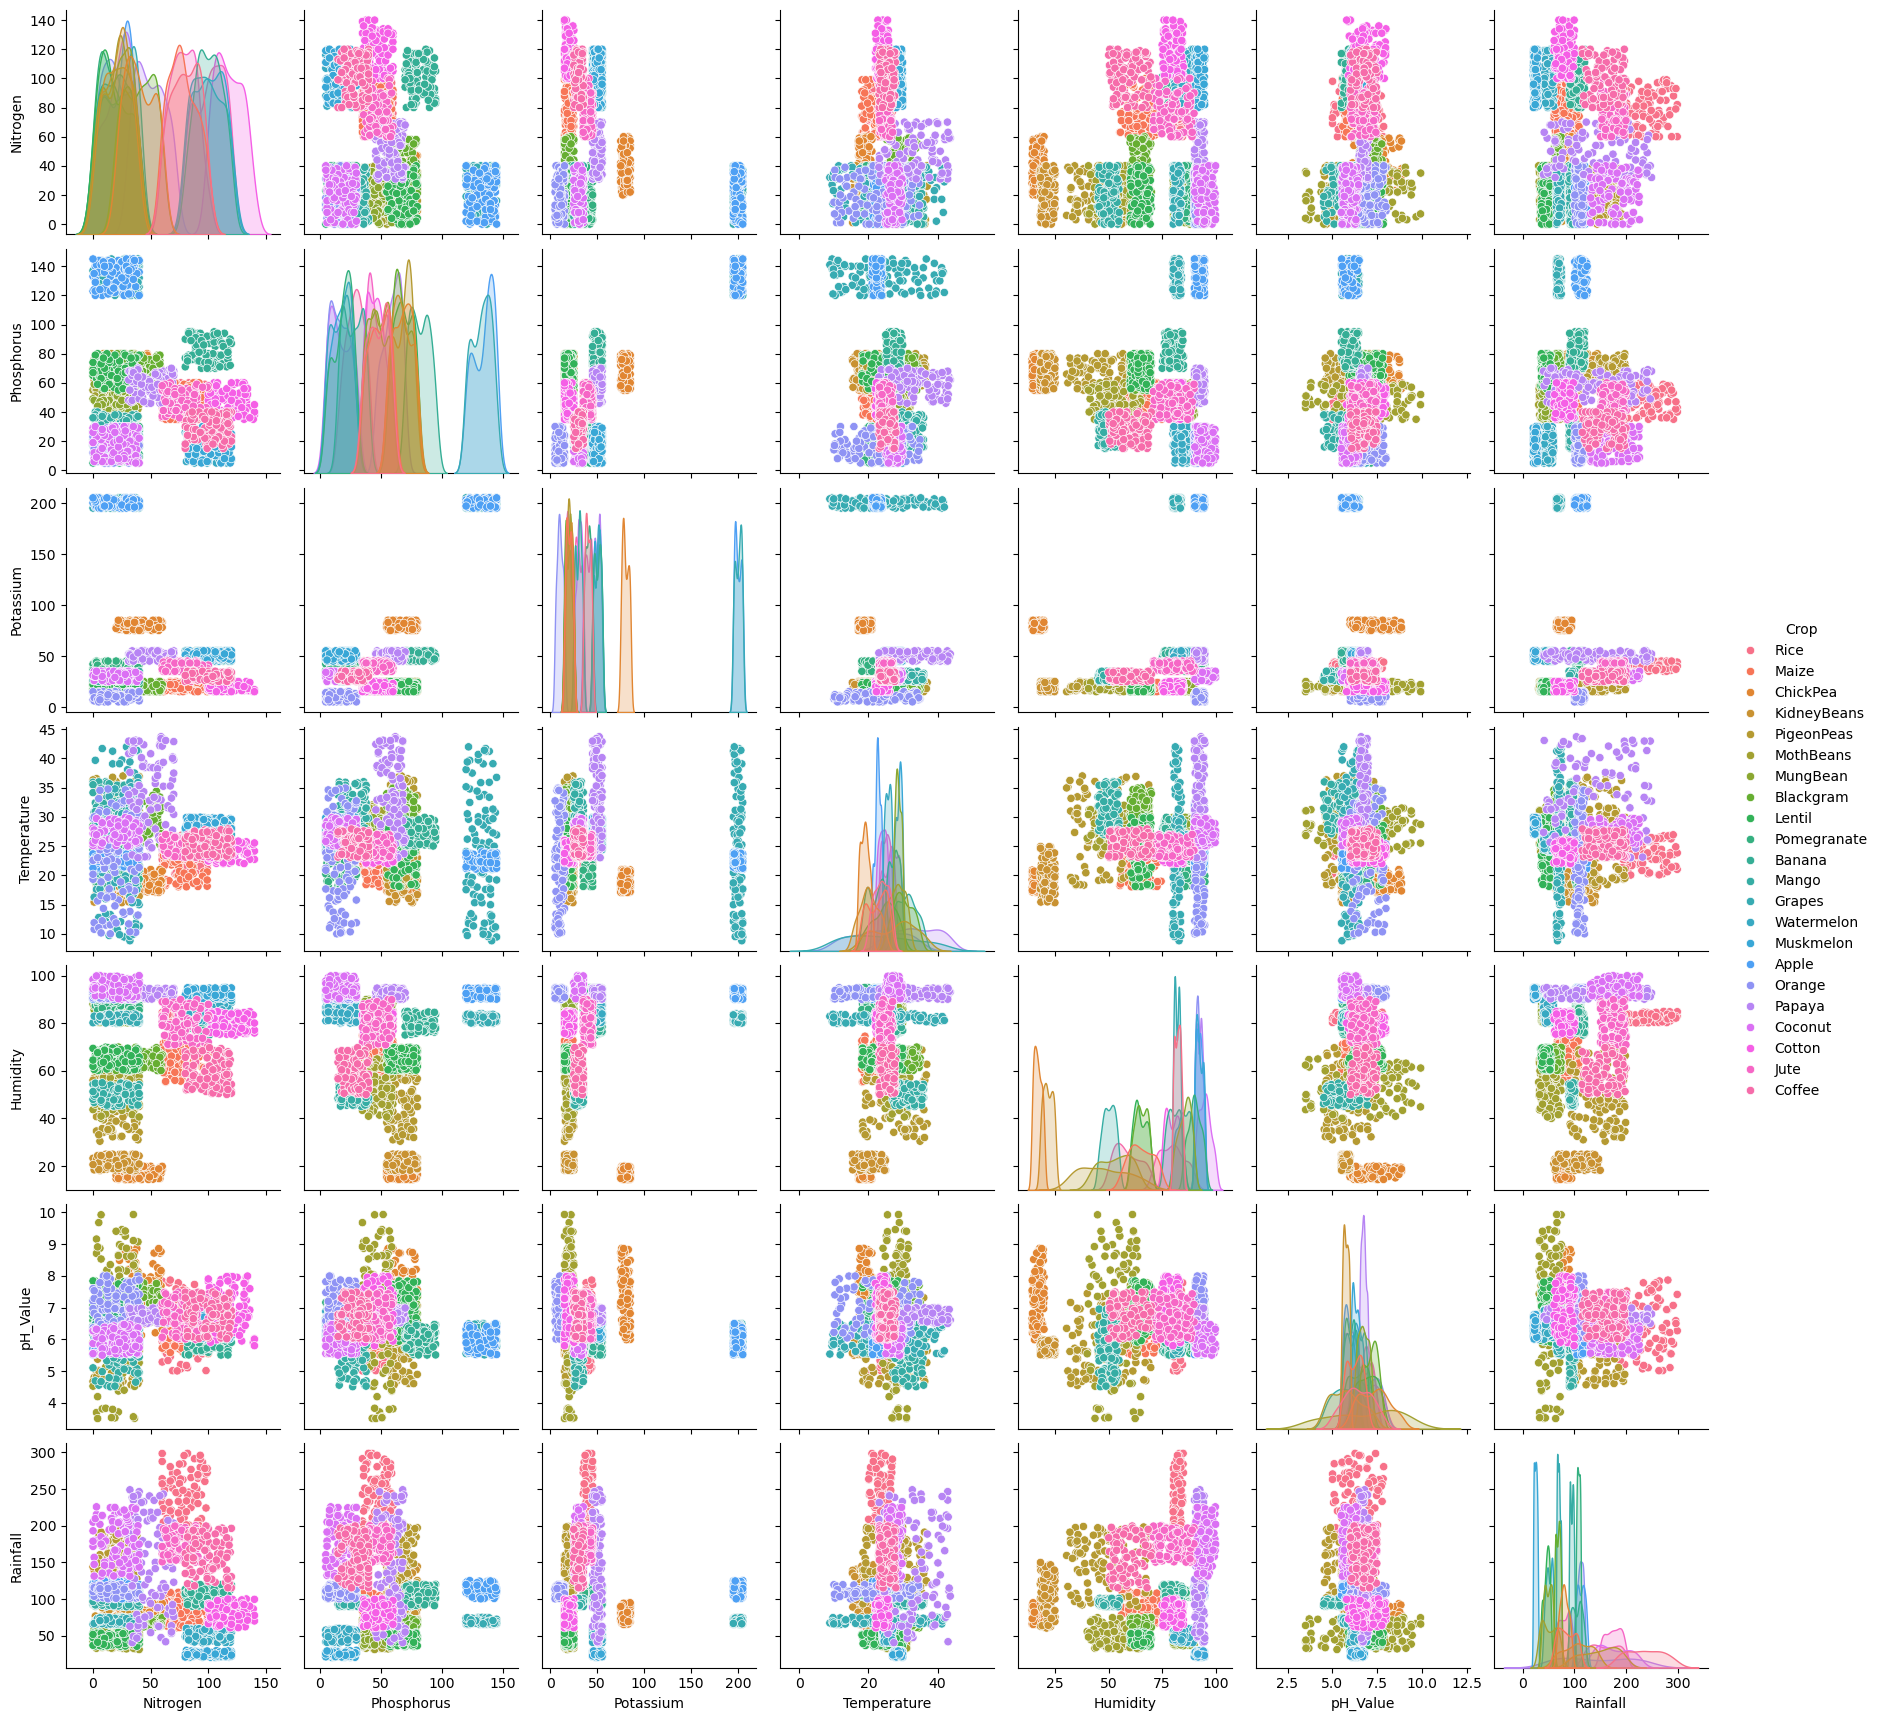

In [20]:
sns.pairplot(Agri, hue='Crop')
plt.show()

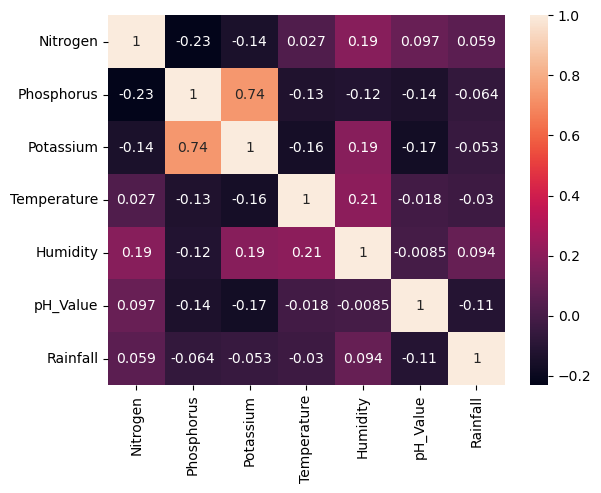

In [21]:
import seaborn as sns
sns.heatmap(corr, annot=True, cbar= True)
plt.show()

In [22]:
Agri.Crop.value_counts()


Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [23]:
Agri['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [24]:
Agri['Crop'].unique().size

22

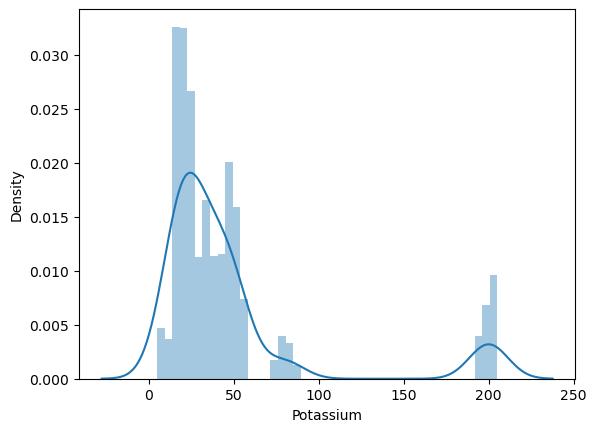

In [25]:
import matplotlib.pyplot as plt
sns.distplot(Agri['Potassium'])
plt.show()

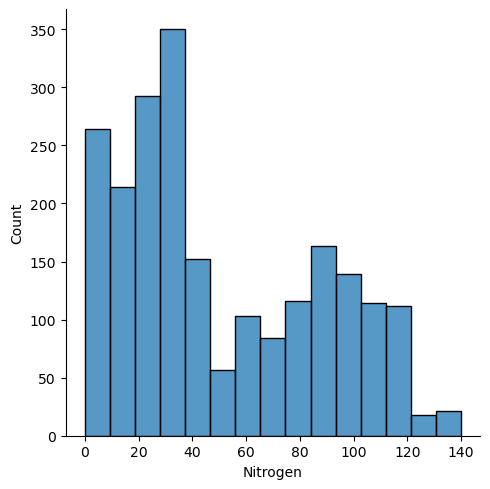

In [26]:
sns.displot(Agri['Nitrogen'])
plt.show()

In [27]:
Agri['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [28]:
#LabelEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np
classes = LabelEncoder()

# Encode labels in column 'species'. 
Agri['Crop']= classes.fit_transform(Agri['Crop']) 
Agri['Crop'].unique() 

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [29]:
X = Agri.iloc[:,0:7]
y = Agri['Crop']

In [30]:
X

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [31]:
yo = classes.inverse_transform(y)
print('int to str : ',np.unique(yo))

int to str :  ['Apple' 'Banana' 'Blackgram' 'ChickPea' 'Coconut' 'Coffee' 'Cotton'
 'Grapes' 'Jute' 'KidneyBeans' 'Lentil' 'Maize' 'Mango' 'MothBeans'
 'MungBean' 'Muskmelon' 'Orange' 'Papaya' 'PigeonPeas' 'Pomegranate'
 'Rice' 'Watermelon']


In [32]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1760, 7)
(440, 7)
(1760,)
(440,)


In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric = 'minkowski', p = 2) #To chcek with Neighbor
knn.fit(x_train,y_train)

KNeighborsClassifier()

# Model Prediction

In [35]:
Agri.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [36]:
def predict_crop(nitrogen, phosphorus, potassium, temperature, humidity, pH_value, rainfall):
    # Create a 2D numpy array (1 sample, n features) for prediction
    sample = np.array([[nitrogen, phosphorus, potassium, temperature, humidity, pH_value, rainfall]])
    
    # Predict crop type
    predicted_label = knn.predict(sample)
    
    # Convert numeric prediction back to crop name
    crop_name = classes.inverse_transform(predicted_label)
    return crop_name[0]

# Example prediction
predicted_crop = predict_crop(78,42,42,20.130175,81.604873,7.628473,262.717340)

print("Recommended Crop:", predicted_crop)


Recommended Crop: Rice


# Model Accuracy

In [38]:
y_pred = knn.predict(x_test)

In [39]:
ac = accuracy_score(y_test, y_pred) 
print(ac)

0.9704545454545455


# Confusion matrix

In [41]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 16  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0 22  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

# Classification report

In [43]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      0.94      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.76      0.96      0.85        23
           9       0.95      1.00      0.98        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
          17       1.00    

In [ ]:
import pickle4 as pickle

# Save the model
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn, file)